# MCT4052 Workshop 6a: Storing and Reloading Features with Pandas

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

Computing features from files (i.e. raw-data) can be a time consuming task. It may be convenient to compute the features once for all and store them in a file, together with the associated label (numeric and/or text) and aditional metadata, such as the  filename. Then we can simply reload computed features from a file, which is significantly faster. We can also compute and store in a file a much larger set of features than what we will actually decide to use later on.

In [3]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
import IPython.display as Ipd
import os
import sklearn
import glob

In [64]:
iterative_files = []
for file in glob.glob(r'C:\Users\nooro\Documents\Robotikk\MCT4052\Week 6\dataset\**\iterative_*.wav', recursive=True):
    iterative_files.append(file)
    
on_off_files = []
for file in glob.glob(r'C:\Users\nooro\Documents\Robotikk\MCT4052\Week 6\dataset\**\on-off_*.wav', recursive=True):
    on_off_files.append(file)
    
sustained_files = []
for file in glob.glob(r'C:\Users\nooro\Documents\Robotikk\MCT4052\Week 6\dataset\**\sustained_*.wav', recursive=True):
    sustained_files.append(file)


all_files = [iterative_files, on_off_files, sustained_files]

In [131]:
def plot_feature(feature):
    fig, ax = plt.subplots()

    img = librosa.display.specshow(feature, x_axis='time', ax=ax)

    fig.colorbar(img, ax=ax)

    ax.set(title='MFCC')

In [132]:
sr = 48000

def extract_features(filename, sr):
    
    signal, dummy = librosa.load(filename, sr=sr, mono=True)
    
    #mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=2)
    
    splits = librosa.effects.split(y=signal, top_db=23, frame_length=10000)
    mfccs = []
    for split in splits:
        start, end = split
        split_audio = signal[start:end]
        mfccs.append(librosa.feature.mfcc(y=split_audio, sr=sr, n_mfcc=2))
    
    
    return mfccs

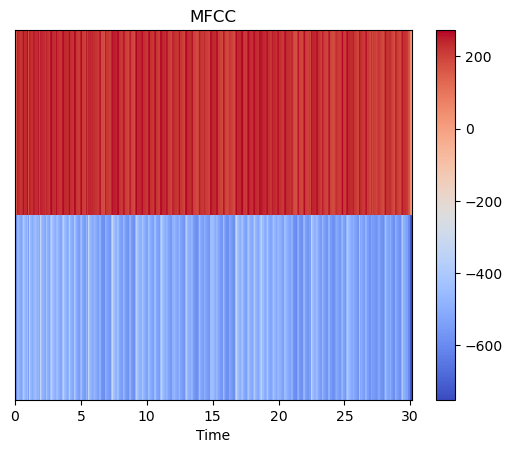

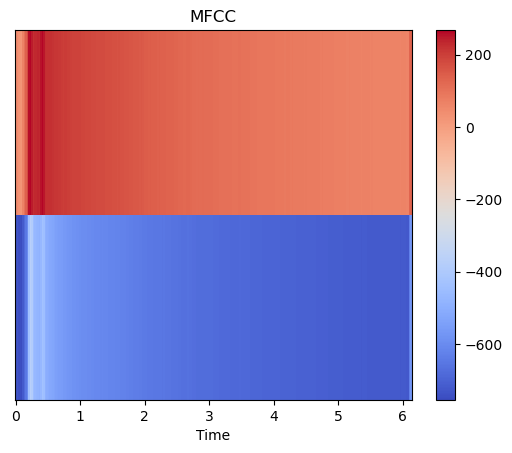

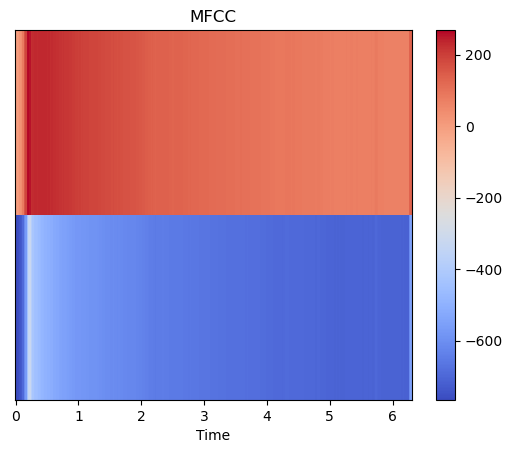

In [133]:
for files in all_files:
    features = []
    for file in files:
        feature = extract_features(file, sr)
        features.extend(feature)
    plot_feature(feature[0])
